<a href="https://colab.research.google.com/github/Hjhirp/Digital-Image-Processing-and-Analysis/blob/main/Lab%207/%20DIPA%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage.io
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import pandas as pd
# from numpy import fft2

# Salt Noise using median

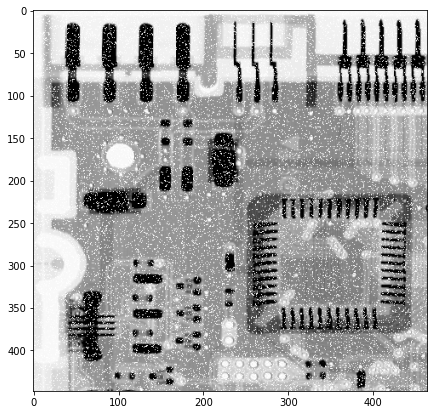

In [ ]:
image1 = skimage.io.imread('/content/fig5.08(b).jpg')

fig = plt.figure(figsize=(10,7))
plt.imshow(image1,cmap='gray')

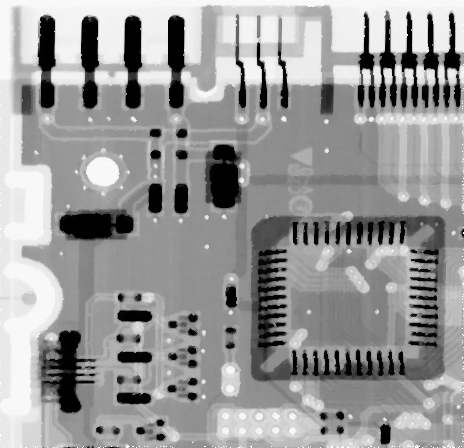

In [ ]:
img=np.copy(image1)
img_=img
s=3
max=255
n1=img_.shape[0]
n2=img_.shape[1]
for i in range(n1):
  for j in range(n2):
    i1=i-s//2
    j1=j-s//2
    ft=[]
    if i1>=0 and i1+s<n1 and j1>=0 and j1+s<n2:
      ft = np.array([img_[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])
    if len(ft) !=0:
      med = np.median(ft)
      if(med!=max):
        img[i][j]=med

cv2_imshow(np.asarray(img))


# Pepper noise using median

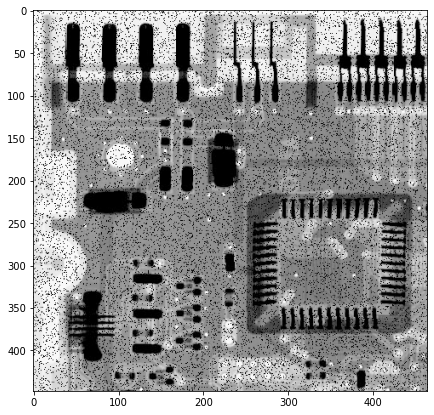

In [ ]:
image2 = skimage.io.imread('/content/fig5.08(a).jpg')

fig = plt.figure(figsize=(10,7))
plt.imshow(image2,cmap='gray')

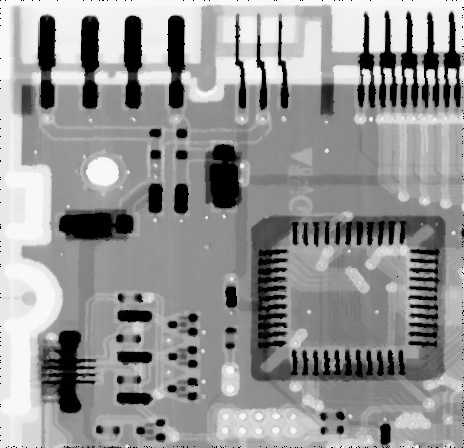

In [ ]:
img=np.copy(image2)
img_=img
min=0
for i in range(img_.shape[0]):
  for j in range(img_.shape[1]):
    i1=i-s//2
    j1=j-s//2
    ft=[]
    if i1>=0 and i1+s<img_.shape[0]and j1>=0 and j1+s<img_.shape[1]:
      ft = np.array([img_[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])
    if len(ft) !=0:
      med = np.median(ft)
      if(med!=min):
        img[i][j]=med

cv2_imshow(np.asarray(img))


# salt and pepper noise

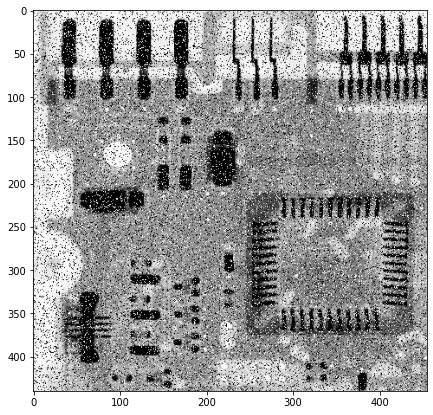

In [ ]:
image3 = skimage.io.imread('/content/fig5.10(a).jpg')

fig = plt.figure(figsize=(10,7))
plt.imshow(image3,cmap='gray')

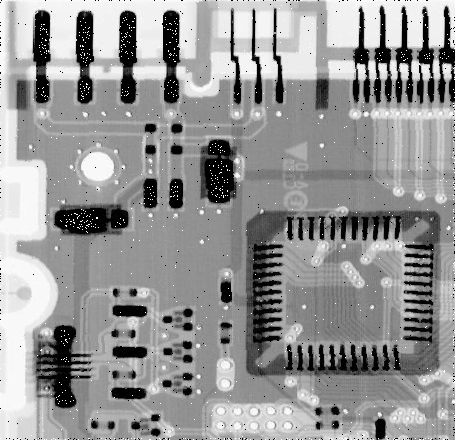

In [ ]:
img=np.copy(image3)
img_=img
sz=3
min=0
for i in range(img_.shape[0]):
  for j in range(img_.shape[1]):
    i1=i-s//2
    j1=j-s//2
    ft=[]
    if i1>=0 and i1+s<img_.shape[0] and j1>=0 and j1+s<img_.shape[1]:
      ft = np.array([img_[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])
    if len(ft) !=0:
      med = np.median(ft)
      if(med!=min and med!=max and (img_[i][j]==min or img_[i][j]==max)):
        img[i][j]=med

cv2_imshow(np.asarray(img))


# Adaptive Medium

Size:  3
Size:  5
Size:  7
Size:  9


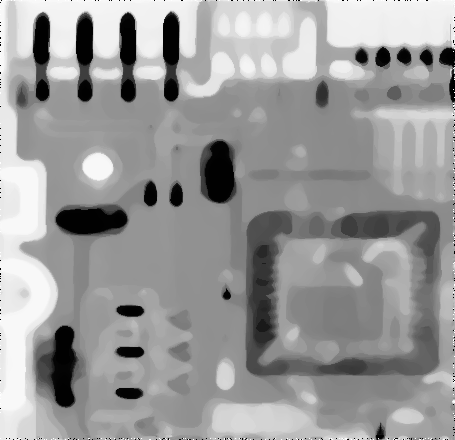

In [ ]:
img=np.copy(image3)
img_=img
sz=[3,5,7,9]
min=0

for s in sz:
  cnt=0
  for i in range(image3.shape[0]):
    for j in range(image3.shape[1]):
      i1=i-s//2
      j1=j-s//2
      ft=[]
      if i1>=0 and i1+s<img_.shape[0] and j1>=0 and j1+s<img_.shape[1]:
        ft = np.array([img_[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])
      # print(ft)
      if len(ft) !=0:
        md = np.median(ft)
        # if image1[i][j]==min and image1[i][j]==max:
        if md==min or md==max:
          cnt=+1
        else :
          img[i][j]=md

  print("Size: ",s)
  if cnt==0: break

cv2_imshow(np.asarray(img))


# Geometric Mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


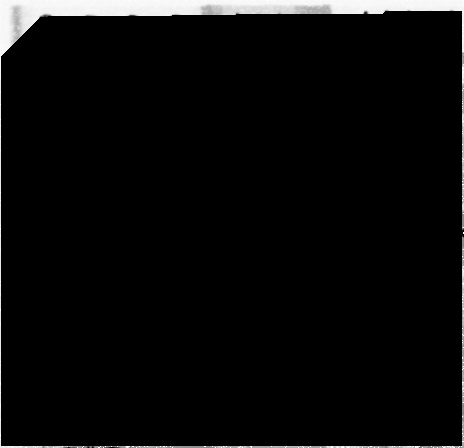

In [ ]:

s=3
def g_mean(x):
  a = np.log(x)
  return np.exp(a.mean())

p=1

im=np.copy(image1)
img = im
n1 = im.shape[0]
n2 = im.shape[1]
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    i1=i-s//2
    j1=j-s//2
    ft=[]
    if i1>=0 and i1+s<n1 and j1>=0 and j1+s<n2:
      ft = np.array([im[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])
      x=g_mean(ft)

      if(x!=min or x!=max) :
        img[i][j]=x
cv2_imshow(np.asarray(img))

# Harmonic Mean

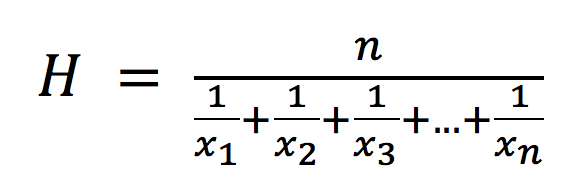

In [ ]:
def harmonic(image,s):
  image_=np.copy(image1)
  img = image_
  n1 = img.shape[0]
  n2 = img.shape[1]
  ft=[]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      i1=i-s//2
      j1=j-s//2
      ft=[]
      if i1>=0 and i1+s<n1 and j1>=0 and j1+s<n2:
        ft = np.array([img[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])
        # print(ft)

        if len(ft) !=0:
          x=float(0)
          for p1 in ft:
            if p1!=0:
              x+=(1/p1)
          if(x!=0 or x!=9*255) :
            image_[i][j]=9/x
  return image_


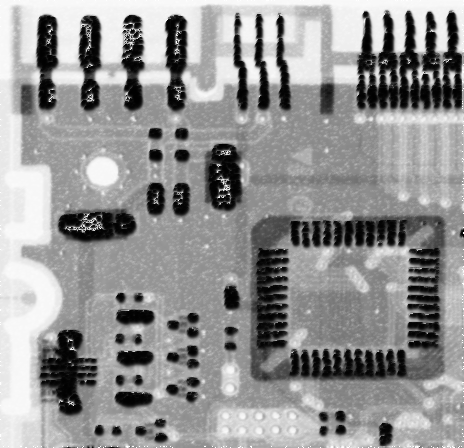

In [ ]:
cv2_imshow(np.asarray(harmonic(image1,3)))

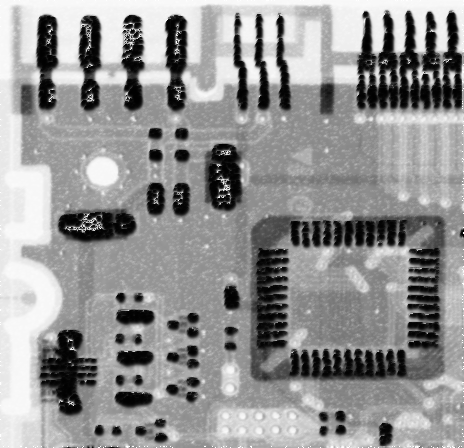

In [ ]:
cv2_imshow(np.asarray(harmonic(image2,3)))

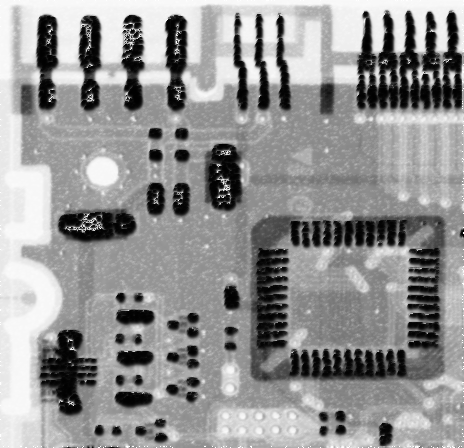

In [ ]:
cv2_imshow(np.asarray(harmonic(image3,3)))

# Contra harmonic mean filter

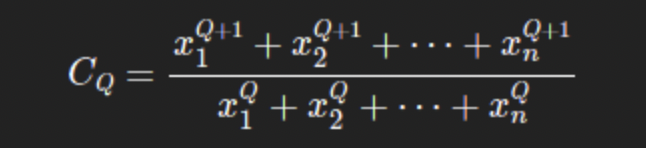

can be used for salt or pepper but not for both

positive Q for Pepper noise

negative Q for Salt noise

In [ ]:
def contraharmonic_mean(image,s,Q,noiseType):
  image_=np.copy(image)
  img = image_
  n1 = img.shape[0]
  n2 = img.shape[1]
  ft=[]
  for i in range(n1):
    for j in range(n2):
      i1=i-s//2
      j1=j-s//2
      ft=[]
      if i1>=0 and i1+s<n1 and j1>=0 and j1+s<n2:
        ft = np.array([img[i2][j2] for i2 in range(i1,i1+s) for j2 in range(j1,j1+s)])

        n =0
        d =0

        for i2 in ft:
          if i2!=0:
            if Q+1 < 0:
              n_ = i2**(-1*(Q+1))
              n+= 1/n_
            else:
              n+=i2**(Q+1)
            if Q<0:
              d_ = i2**(-1*Q)
              d+= 1/d_
            else:
              d+=i2**Q
        if d!=0:
          mn = n/d

          if mn!=noiseType:
            image_[i][j]=mn
  return image_


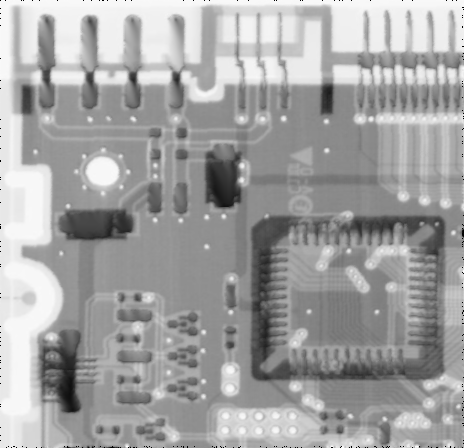

In [ ]:
#Pepper Noise
cv2_imshow(np.asarray(contraharmonic_mean(image2,3,1,0)))

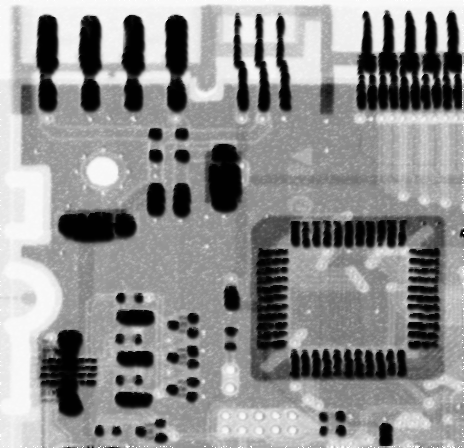

In [ ]:
#Salt Noise
cv2_imshow(np.asarray(contraharmonic_mean(image1,3,-1,255)))